In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2
from keras.preprocessing import image

In [2]:
TRAIN_PATH = "C:/Users/devka/Desktop/Deep Learning/Dataset/Train"
VAL_PATH = "C:/Users/devka/Desktop/Deep Learning/Dataset/Val"

In [3]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/devka/Desktop/Deep Learning/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_dataset.flow_from_directory(
    'C:/Users/devka/Desktop/Deep Learning/Dataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [5]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/15
8/8 [==============================] - 40s 5s/step - loss: 0.7954 - accuracy: 0.4648 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 41s 5s/step - loss: 0.6909 - accuracy: 0.5156 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 43s 5s/step - loss: 0.6655 - accuracy: 0.6172 - val_loss: 0.6507 - val_accuracy: 0.8333
Epoch 4/15
8/8 [==============================] - 46s 6s/step - loss: 0.5615 - accuracy: 0.7305 - val_loss: 0.4803 - val_accuracy: 0.8667
Epoch 5/15
8/8 [==============================] - 54s 7s/step - loss: 0.4059 - accuracy: 0.8320 - val_loss: 0.2842 - val_accuracy: 0.9833
Epoch 6/15
8/8 [==============================] - 45s 6s/step - loss: 0.3090 - accuracy: 0.8867 - val_loss: 0.2149 - val_accuracy: 0.9833
Epoch 7/15
8/8 [==============================] - 44s 6s/step - loss: 0.2406 - accuracy: 0.9414 - val_loss: 0.1006 - val_accuracy: 0.9833
Epoch 8/15
8/8 [==================

In [6]:
model.save("Covid_19.h5")

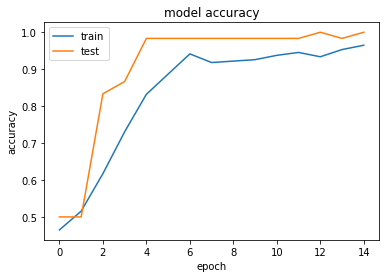

In [7]:
history = hist
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

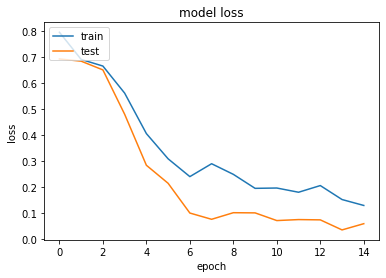

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
def predict_image(path):
    xtest_image = image.load_img(path, target_size = (224, 224))
    xtest_image = image.img_to_array(xtest_image)
    xtest_image = np.expand_dims(xtest_image, axis = 0)
    results=(model.predict(xtest_image) > 0.5).astype("int32")
    imagee = cv2.imread(path)
    imagee = np.array(imagee)
    imagee = cv2.resize(imagee,(400,400))
    plt.imshow(imagee)
    if results[0][0] == 0:
        prediction = 'Covid-19 Positive'
    else:
        prediction = 'Covid-19 Negative'
        
    return prediction


Prediction:  Covid-19 Positive


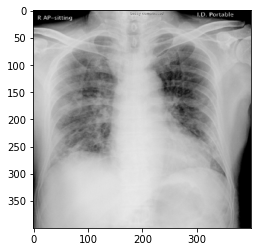

In [14]:
img_path="C:/Users/devka/Desktop/Deep Learning/Dataset/Prediction/ryct.2020200034.fig5-day7.jpeg"
predicted=predict_image(img_path)
print("\nPrediction: ",predicted)


Prediction:  Covid-19 Positive


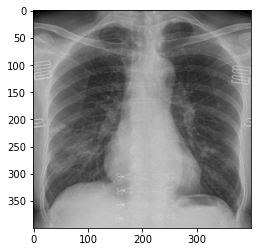

In [16]:
img_path="C:/Users/devka/Desktop/Deep Learning/Dataset/Prediction/ryct.2020200028.fig1a.jpeg"
predicted=predict_image(img_path)
print("\nPrediction: ",predicted)


Prediction:  Covid-19 Negative


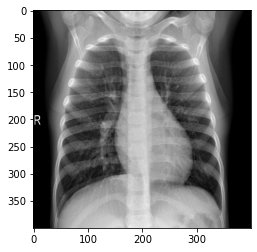

In [17]:
img_path="C:/Users/devka/Desktop/Deep Learning/Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg"
predicted=predict_image(img_path)
print("\nPrediction: ",predicted)


Prediction:  Covid-19 Negative


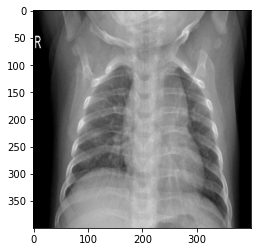

In [18]:
img_path="C:/Users/devka/Desktop/Deep Learning/Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg"
predicted=predict_image(img_path)
print("\nPrediction: ",predicted)